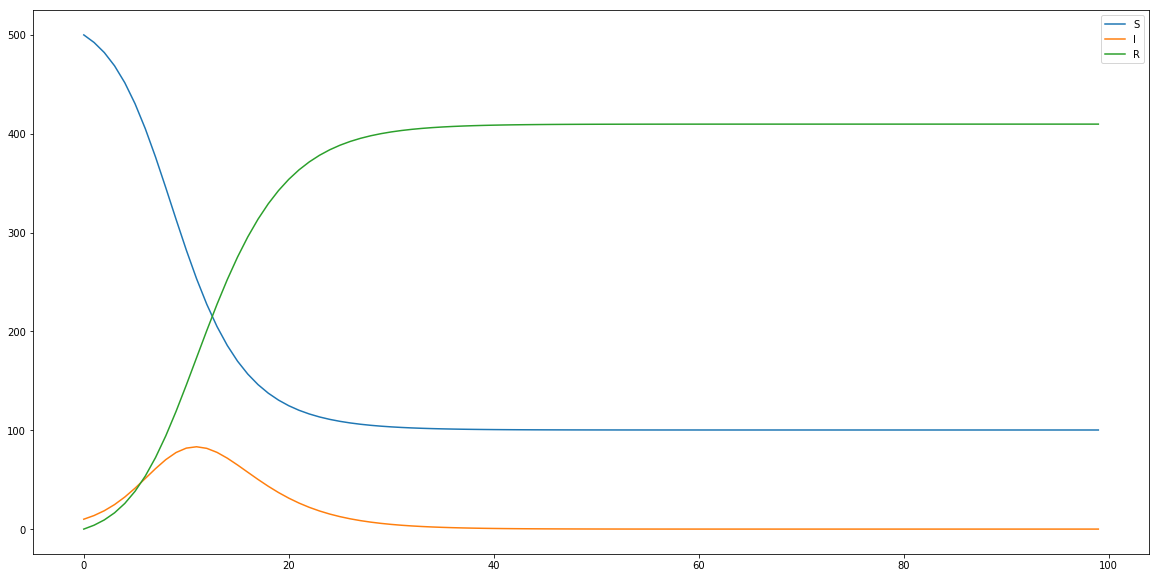

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# I0, R0, and S0 are the initial states for the SIRS
# model.  We assume a single initial case of infection.
I0 = 10.0
R0 = 0.0
S0 = 500.0

# The parameter gamma is a rate of infection.  We drew
# the estimate here from the literature.
# Rho here stands for r naught, and is the parameter
# of interest to most epidemiologists. A future post
# will discuss finding this using stochastic optimization
# techniques.
gamma = 1.0/3.0
rho = 2.0
beta = rho*gamma

Measures = [("n_S", [0.0, 100.0, 1.0]), ("n_I", [0.0, 100.0, 1.0]), ("n_R", [0.0, 100.0, 1.0])]

def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / (S+I+R)
    dIdt = beta * S * I / (S+I+R) - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

min = 0
max = 100
t = list(np.arange(min, max, 1.0))

ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T

# Our SIRS model predicts infected individuals, while
# the CDC data is in terms of incidence of infection
# witnessed at labs, we correct for this difference
# in measure here.
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(t, S, label="S")
ax.plot(t, I, label="I")
ax.plot(t, R, label="R")
ax.legend()
ax